In [37]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('software_engineering.csv')
df.head()

,EmployeeID,JobRole,Department,Age,YearsExperience,SalaryBeforeTraining,SalaryAfterTraining,NumberOfProjects,PerformanceScore,TrainingHours,EducationLevel,RemoteWork,SatisfactionLevel,Certification,Gender,DepartmentSize
0,1,Developer,IT,27,4.2,46241.46,51625.56,1,2.29,5.22,High School,Yes,Medium,Yes,Female,Small
1,2,Analyst,HR,26,3.2,81406.22,85787.99,2,1.74,16.09,Master's,Yes,Low,No,Male,Medium
2,3,Manager,HR,29,5.4,81787.00,87054.08,2,2.78,9.31,Bachelor's,No,Medium,Yes,Male,Medium
3,4,Tester,Finance,25,13.8,76381.86,81076.92,2,2.69,21.67,Master's,No,Medium,No,Male,Large
4,5,Developer,Finance,27,6.6,55495.36,61911.58,2,5.00,3.04,Bachelor's,No,Medium,Yes,Male,Small


In [38]:
# Separar los grupos según certificación
exp_cert = df[df['Certification'] == 'Yes']['YearsExperience']
exp_no_cert = df[df['Certification'] == 'No']['YearsExperience']

# Estadísticas descriptivas
print('Promedio con certificación:', exp_cert.mean())
print('Promedio sin certificación:', exp_no_cert.mean())

# Prueba de normalidad
print('Shapiro con certificación:', stats.shapiro(exp_cert))
print('Shapiro sin certificación:', stats.shapiro(exp_no_cert))

# Prueba de igualdad de varianzas
print('Levene:', stats.levene(exp_cert, exp_no_cert))

# Prueba t de Student para muestras independientes
t_stat, p_val = stats.ttest_ind(exp_cert, exp_no_cert, equal_var=False)
print('t-student:', t_stat, 'p-valor:', p_val)

# Conclusión
if p_val < 0.05:
    print('Hay diferencia significativa en los años de experiencia promedio entre empleados con y sin certificación.')
else:
    print('No hay diferencia significativa en los años de experiencia promedio entre empleados con y sin certificación.')

Promedio con certificación: 4.831782945736434
Promedio sin certificación: 5.9865497076023395
Shapiro con certificación: ShapiroResult(statistic=np.float64(0.820643415670503), pvalue=np.float64(2.995947463441282e-11))
Shapiro sin certificación: ShapiroResult(statistic=np.float64(0.8514345418755421), pvalue=np.float64(6.790860773372827e-12))
Levene: LeveneResult(statistic=np.float64(3.89584654557574), pvalue=np.float64(0.04932909337951624))
t-student: -1.9104603123297665 p-valor: 0.05703846943011048
No hay diferencia significativa en los años de experiencia promedio entre empleados con y sin certificación.


In [39]:
# Buscar el tipo de empleado con el salario más bajo antes de la capacitación
min_salary_row = df.loc[df['SalaryBeforeTraining'].idxmin()]
print('Tipo de empleado con salario más bajo antes de la capacitación:')
print('JobRole:', min_salary_row['JobRole'])
print('Department:', min_salary_row['Department'])
print('Salario:', min_salary_row['SalaryBeforeTraining'])

Tipo de empleado con salario más bajo antes de la capacitación:
JobRole: Developer
Department: Operations
Salario: 30000.0


In [40]:
# Prueba de normalidad para la diferencia
salary_diff = df['SalaryAfterTraining'] - df['SalaryBeforeTraining']
print('Shapiro diferencia:', stats.shapiro(salary_diff))

# Prueba t para muestras relacionadas (pareadas)
t_stat, p_val = stats.ttest_rel(df['SalaryAfterTraining'], df['SalaryBeforeTraining'])
print('t-student pareada:', t_stat, 'p-valor:', p_val)

# Conclusión
if p_val < 0.05:
    print('Existen diferencias significativas en los salarios promedios antes y después de la capacitación.')
else:
    print('No existen diferencias significativas en los salarios promedios antes y después de la capacitación.')

Shapiro diferencia: ShapiroResult(statistic=np.float64(0.9968713412741266), pvalue=np.float64(0.8294919505765852))
t-student pareada: 44.36151813091807 p-valor: 1.4745936284179963e-133
Existen diferencias significativas en los salarios promedios antes y después de la capacitación.


In [41]:
# Separar los grupos según certificación
train_cert = df[df['Certification'] == 'Yes']['TrainingHours']
train_no_cert = df[df['Certification'] == 'No']['TrainingHours']

# Estadísticas descriptivas
print('Promedio horas con certificación:', train_cert.mean())
print('Promedio horas sin certificación:', train_no_cert.mean())

# Prueba de normalidad
print('Shapiro con certificación:', stats.shapiro(train_cert))
print('Shapiro sin certificación:', stats.shapiro(train_no_cert))

# Prueba de igualdad de varianzas
print('Levene:', stats.levene(train_cert, train_no_cert))

# Prueba t de Student para muestras independientes
t_stat, p_val = stats.ttest_ind(train_cert, train_no_cert, equal_var=False)
print('t-student:', t_stat, 'p-valor:', p_val)

# Conclusión
if p_val < 0.05:
    print('Las horas de capacitación entre empleados con y sin certificación son diferentes.')
else:
    print('Las horas de capacitación entre empleados con y sin certificación son similares.')

Promedio horas con certificación: 20.807286821705425
Promedio horas sin certificación: 17.843157894736844
Shapiro con certificación: ShapiroResult(statistic=np.float64(0.7677475698689027), pvalue=np.float64(5.195984345620387e-13))
Shapiro sin certificación: ShapiroResult(statistic=np.float64(0.8561339322050057), pvalue=np.float64(1.1240109833412898e-11))
Levene: LeveneResult(statistic=np.float64(1.4030553674769988), pvalue=np.float64(0.23715652215755817))
t-student: 1.2761966645138128 p-valor: 0.20316116037531556
Las horas de capacitación entre empleados con y sin certificación son similares.


In [42]:
# Empleados con más horas de capacitación
top_training = df.sort_values('TrainingHours', ascending=False).head(5)
print('Empleados con más horas de capacitación:')
print(top_training[['EmployeeID', 'JobRole', 'Department', 'TrainingHours']])

Empleados con más horas de capacitación:
     EmployeeID    JobRole  Department  TrainingHours
53           54    Manager          IT         154.47
118         119    Manager     Finance          92.32
207         208     Tester  Operations          82.17
193         194     Tester          IT          78.82
250         251  Developer          HR          70.91


Edad promedio por JobRole y Department:
Department    Finance         HR         IT  Operations
JobRole                                                
Analyst     30.000000  29.333333  30.285714   27.333333
Developer   29.920000  31.086957  30.326087   28.828571
Manager     29.090909  29.642857  29.384615   28.090909
Tester      28.882353  30.000000  28.862069   30.000000
Chi2: 6.039521380672168 p-valor: 0.7359563949134518
Residuos estandarizados:
Department   Finance        HR        IT  Operations
JobRole                                             
Analyst     0.124224  0.208747  0.864784   -1.421030
Developer  -0.073458 -0.305004 -0.490609    0.978517
Manager    -0.341744  0.646815  0.458110   -0.863292
Tester      0.319339 -0.307794 -0.300965    0.373002


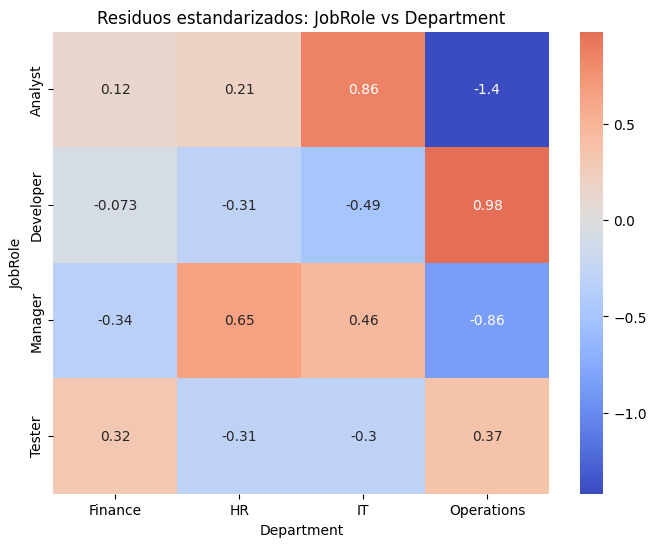

No existe asociación significativa entre JobRole y Department.
No hay residuos estandarizados significativos; ninguna celda contribuye de forma destacada a la asociación.


In [43]:
# Crear tabla de contingencia de edad promedio por JobRole y Department
pivot = df.pivot_table(index='JobRole', columns='Department', values='Age', aggfunc='mean')
print('Edad promedio por JobRole y Department:')
print(pivot)

# Para asociación, creamos una tabla de frecuencias
contingency = pd.crosstab(df['JobRole'], df['Department'])

# Prueba de chi2
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print('Chi2:', chi2, 'p-valor:', p)

# Calcular residuos estandarizados
residuals = (contingency - expected) / np.sqrt(expected)
print('Residuos estandarizados:')
print(residuals)

# Visualización de residuos
plt.figure(figsize=(8,6))
sns.heatmap(residuals, annot=True, cmap='coolwarm', center=0)
plt.title('Residuos estandarizados: JobRole vs Department')
plt.show()

# Conclusión
if p < 0.05:
    print('Existe asociación significativa entre JobRole y Department.')
else:
    print('No existe asociación significativa entre JobRole y Department.')

# Identificar celdas con residuos estandarizados significativos
significativo = np.abs(residuals) > 2

# Crear un DataFrame que muestre el residuo solo si es significativo
if significativo.any().any():
    residuos_significativos = residuals.where(significativo).dropna(how='all').dropna(axis=1, how='all')
    print('Residuos estandarizados significativos (|residuo| > 2):')
    print(residuos_significativos)
    print('Estas celdas contribuyen significativamente a la asociación entre JobRole y Department.')
else:
    print('No hay residuos estandarizados significativos; ninguna celda contribuye de forma destacada a la asociación.')